# **Data Visualization + SQLite**


Objectives:

*   Visualize the distribution of data.

*   Visualize the relationship between two features.

*   Visualize composition of data.

*   Visualize comparison of data.


<hr>


Download database file


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2022-10-04 15:21:34--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: 'm4_survey_data.sqlite.2'

m4_survey_data.sqli 100%[===================>]  34.98M  1.49MB/s    in 20s     

2022-10-04 15:21:55 (1.75 MB/s) - 'm4_survey_data.sqlite.2' saved [36679680/36679680]



Connect to the database.


In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection
print("done")

done


In [3]:
import pandas as pd

Check everything is working with a SQL query

In [4]:

QUERY = """
SELECT COUNT(*)
FROM master
"""

df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


Listing all tables in database

In [5]:
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""

pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


Describing table and checking columns 

In [7]:
table_name = 'master' 

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

Plotting a histogram of `ConvertedComp.`


Text(0.5, 0, 'Annual USD salaries')

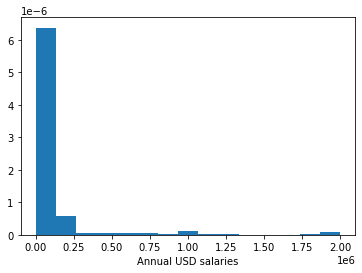

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt


query_cc = "SELECT convertedcomp FROM master"

df_cc = pd.read_sql_query(query_cc, conn)

plt.hist(df_cc, density=True, bins=15)
plt.xlabel('Annual USD salaries')

Boxplot for `Age.`


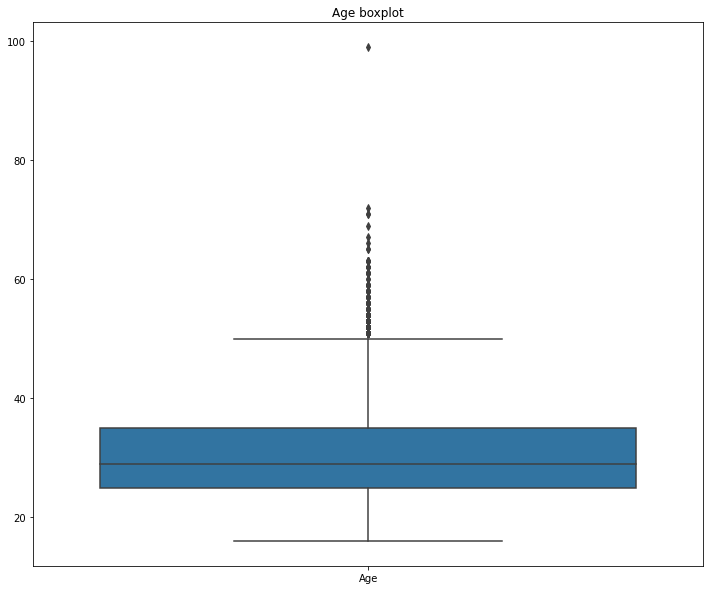

In [9]:
query_age = "SELECT age FROM master"

df_age = pd.read_sql_query(query_age, conn)

plt.figure(figsize=(12,10))
plt.title('Age boxplot')
sns.boxplot(data=df_age)
plt.show()

Creating a scatter plot of `Age` and `WorkWeekHrs.` to check for relationships. 


Text(0.5, 0, 'Age')

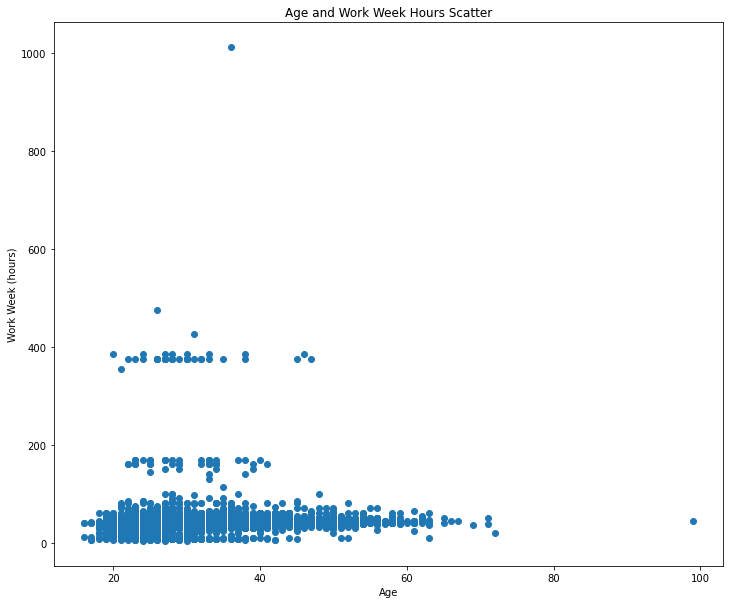

In [10]:
query_wwh = "SELECT workweekhrs FROM master"

df_wwh = pd.read_sql_query(query_wwh, conn)

plt.figure(figsize=(12, 10))
plt.title("Age and Work Week Hours Scatter")
plt.scatter(x=df_age, y=df_wwh)
plt.ylabel("Work Week (hours)")
plt.xlabel("Age")

Bubble plot for `WorkWeekHrs` and `CodeRevHrs`, using `Age` column as bubble size.


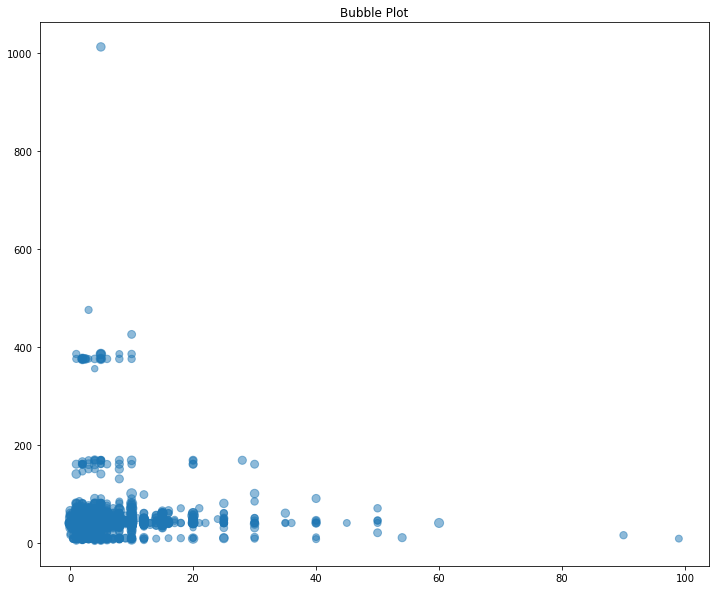

In [11]:
query_crh = "SELECT coderevhrs FROM master"

df_crh = pd.read_sql_query(query_crh, conn)


plt.figure(figsize=(12, 10))
plt.title("Bubble Plot")
plt.scatter(x=df_crh, y=df_wwh, s=(df_age * 2), alpha=0.5)


Creating a pie chart of the top 5 databases that respondents wish to learn next year, whilst also creating another chart and query to help with assignment questions:

- In the list of most popular languages respondents wish to learn next year, what is the rank of Python?
- How many respondents indicated that they work on 'MySQL' only?


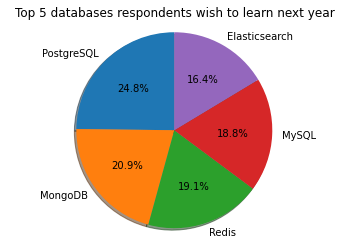

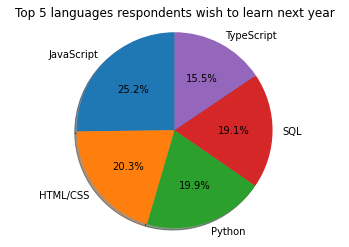

      count(respondent)  Respondent    DatabaseWorkedWith
0                     1          25                 MySQL
1                     1          38  Microsoft SQL Server
2                     1          70  Microsoft SQL Server
3                     1          74              DynamoDB
4                     1          75               MongoDB
...                 ...         ...                   ...
2510                  1       25128                SQLite
2511                  1       25136  Microsoft SQL Server
2512                  1       25137                 MySQL
2513                  1       25138            PostgreSQL
2514                  1       25142            PostgreSQL

[2515 rows x 3 columns]
474


In [109]:
query_db = "select count(DatabaseDesireNextYear) as Count,DatabaseDesireNextYear from DatabaseDesireNextYear group by DatabaseDesireNextYear order by count(DatabaseDesireNextYear) DESC LIMIT 5"

df_db = pd.read_sql_query(query_db, conn)

database =  df_db["DatabaseDesireNextYear"]
count = df_db["Count"]


plt.pie(count, labels=database,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('Top 5 databases respondents wish to learn next year')
plt.show()




#LANGUAGES TO LEARN NEXT YEAR

query_db_2 = "select count(LanguageDesireNextYear) as Count,LanguageDesireNextYear from LanguageDesireNextYear group by LanguageDesireNextYear order by count(LanguageDesireNextYear) DESC LIMIT 5"

df_db_2 = pd.read_sql_query(query_db_2, conn)

database_2 =  df_db_2["LanguageDesireNextYear"]
count_2 = df_db_2["Count"]


plt.pie(count_2, labels=database_2,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('Top 5 languages respondents wish to learn next year')
plt.show()

#Current python

query_123 = "SELECT count(respondent), respondent, databaseworkedwith FROM databaseworkedwith GROUP BY respondent HAVING count(respondent) = 1"

df_123 = pd.read_sql_query(query_123, conn)

print(df_123)

x = 0

for y in df_123['DatabaseWorkedWith']:
    if y == "MySQL":
        x += 1
        
print(x)

Stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35

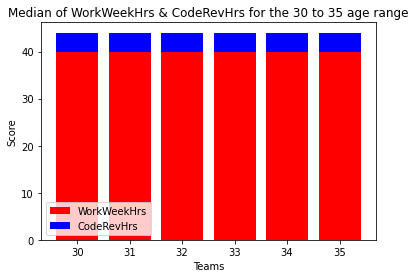

In [15]:
query = "select workweekhrs, coderevhrs, age from master where age between 30 and 35"

df = pd.read_sql_query(query, conn)


df_test = df[["WorkWeekHrs", "CodeRevHrs", "Age"]]
df_grp = df_test.groupby(["Age"], as_index=False).median()

y1 = df_grp['WorkWeekHrs']
y2 = df_grp['CodeRevHrs']
x = df_grp['Age']
 

plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')


plt.xlabel("Teams")
plt.ylabel("Score")
plt.legend(["WorkWeekHrs", "CodeRevHrs"])
plt.title("Median of WorkWeekHrs & CodeRevHrs for the 30 to 35 age range")
plt.show()

Plot the median `ConvertedComp` for all ages from 45 to 60.


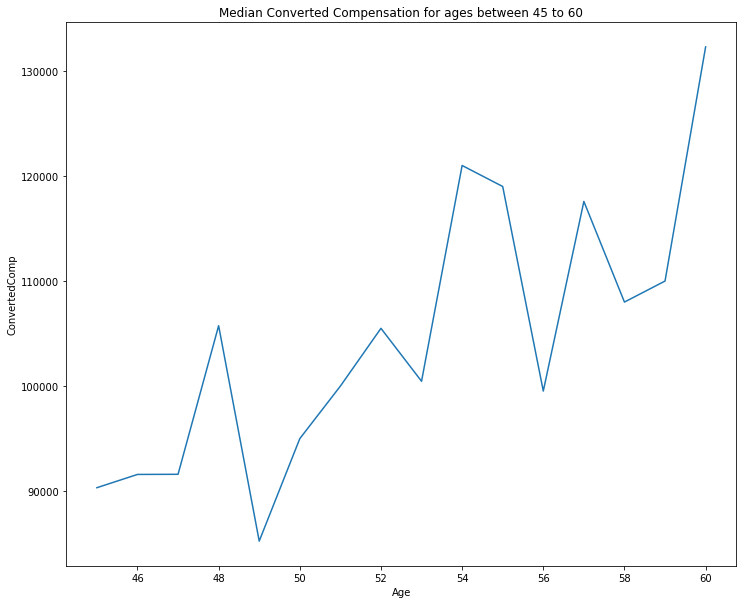

In [112]:
query = "select convertedcomp, age from master where age between 45 and 60"

df = pd.read_sql_query(query, conn)

df_test = df[["ConvertedComp", "Age"]]
df_grp = df_test.groupby(["Age"], as_index=False).median()

age = df_grp["Age"]
comp = df_grp["ConvertedComp"]
plt.figure(figsize=(12, 10))
plt.title("Median Converted Compensation for ages between 45 to 60")
plt.ylabel("ConvertedComp")
plt.xlabel("Age")
plt.plot(age, comp)
plt.show()

Horizontal bar chart using column `MainBranch.`


<AxesSubplot:title={'center':'Horizontal Bar for MainBranch'}, ylabel='MainBranch'>

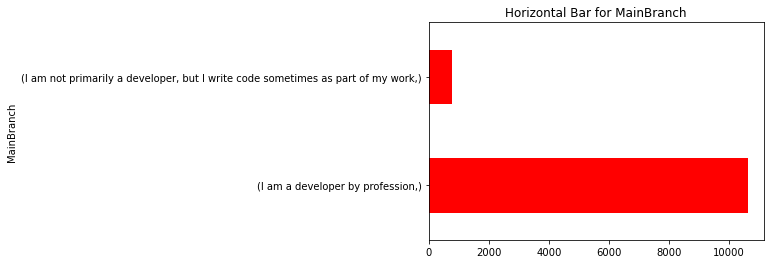

In [51]:
query = "select mainbranch from master"

df = pd.read_sql_query(query, conn)
df.value_counts().plot(kind='barh', color='r', title="Horizontal Bar for MainBranch")


Closing database connection.


In [113]:
conn.close()